In [1]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
# import statsmodels.api as sm
from scipy import stats

In [2]:
from mp_clean_data import *

In [3]:
dataset, map_neigh_groups, map_neigh = cleanData('./data/AB_NYC_2019.csv')

/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adj'][data['name'].str.lower().str.contains(adj) == True] += 1
/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adj'][data['name'].str.lower().str.contains(adj) == True] += 1
/home/venkatesh/Academics/w21/ECE143/ECE143-Project/mp_clean_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_

In [4]:
dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,adj,shared_in_name,airport_in_name,len_name
0,2539,2787,0,0,40.64749,-73.97237,0,149,1,9,855,0.21,6,365,3,0,0,8
1,2595,2845,1,1,40.75362,-73.98377,1,225,1,45,641,0.38,2,355,0,0,0,3
2,3647,4632,1,2,40.80902,-73.94190,0,150,3,0,737840,0.00,1,365,1,0,0,6
3,3831,4869,0,3,40.68514,-73.95976,1,89,1,270,596,4.64,1,194,1,0,0,5
4,5022,7192,1,4,40.79851,-73.94399,1,80,10,9,824,0.10,1,0,2,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,0,6,40.67853,-73.94995,0,70,2,0,737840,0.00,2,9,3,0,0,7
48891,36485057,6570630,0,21,40.70184,-73.93317,0,40,4,0,737840,0.00,2,36,1,0,0,5
48892,36485431,23492952,1,2,40.81475,-73.94867,1,115,10,0,737840,0.00,1,27,1,0,0,5
48893,36485609,30985759,1,7,40.75751,-73.99112,2,55,1,0,737840,0.00,6,2,1,0,0,6


In [5]:
dataset.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
adj                               0
shared_in_name                    0
airport_in_name                   0
len_name                          0
dtype: int64

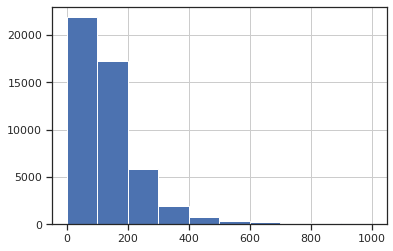

In [6]:
#Histogram of prices less than 1000

hist_price1=dataset["price"][dataset["price"]<1000].hist()

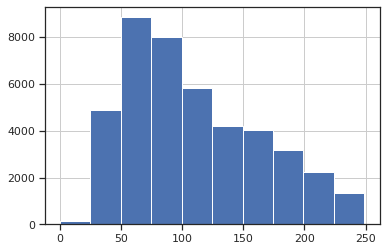

In [7]:
#Histogram of prices less than 250, looks gaussian

hist_price2=dataset["price"][dataset["price"]<250].hist()

In [8]:
# We can consider prices below 250 only, maybe the predictions will be better in this region.

# dataset=dataset[dataset["price"]<250]

In [9]:
map_neigh_groups

{0: 'Brooklyn', 1: 'Manhattan', 2: 'Queens', 3: 'Staten Island', 4: 'Bronx'}

In [10]:
# Correlation of features with price features 
dataset.corr()['price']

id                                0.010619
host_id                           0.015309
neighbourhood_group               0.002672
neighbourhood                    -0.054963
latitude                          0.033939
longitude                        -0.150019
room_type                         0.206027
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
last_review                       0.085167
reviews_per_month                -0.050564
calculated_host_listings_count    0.057472
availability_365                  0.081829
adj                              -0.053037
shared_in_name                   -0.039389
airport_in_name                  -0.019832
len_name                          0.033186
Name: price, dtype: float64

In [11]:
dataset['adj']

0        3
1        0
2        1
3        1
4        2
        ..
48890    3
48891    1
48892    1
48893    1
48894    0
Name: adj, Length: 48895, dtype: int64

Text(0.5, 1.0, 'Room Type vs Price')

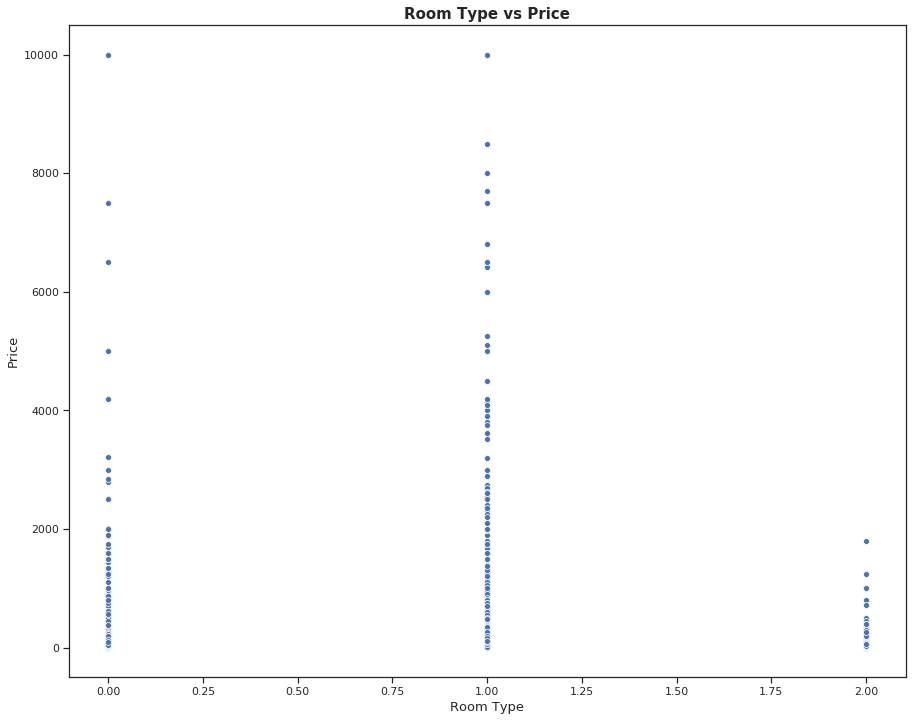

In [12]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=dataset)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

In [13]:
dataset.drop(['id','last_review'], axis=1, inplace=True)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'adj',
       'shared_in_name', 'airport_in_name', 'len_name'],
      dtype='object')

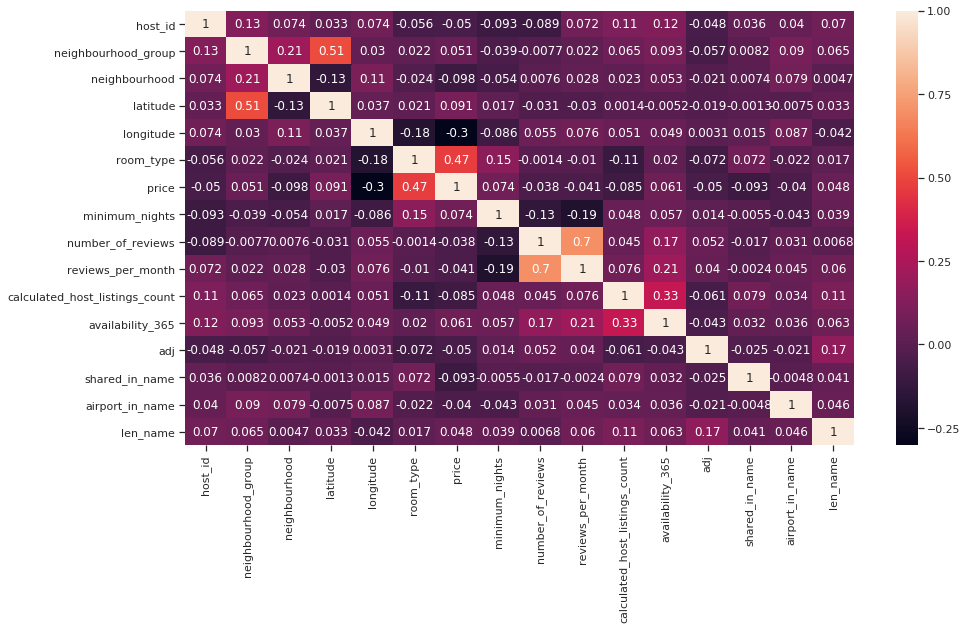

In [14]:
corr = dataset.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset.columns

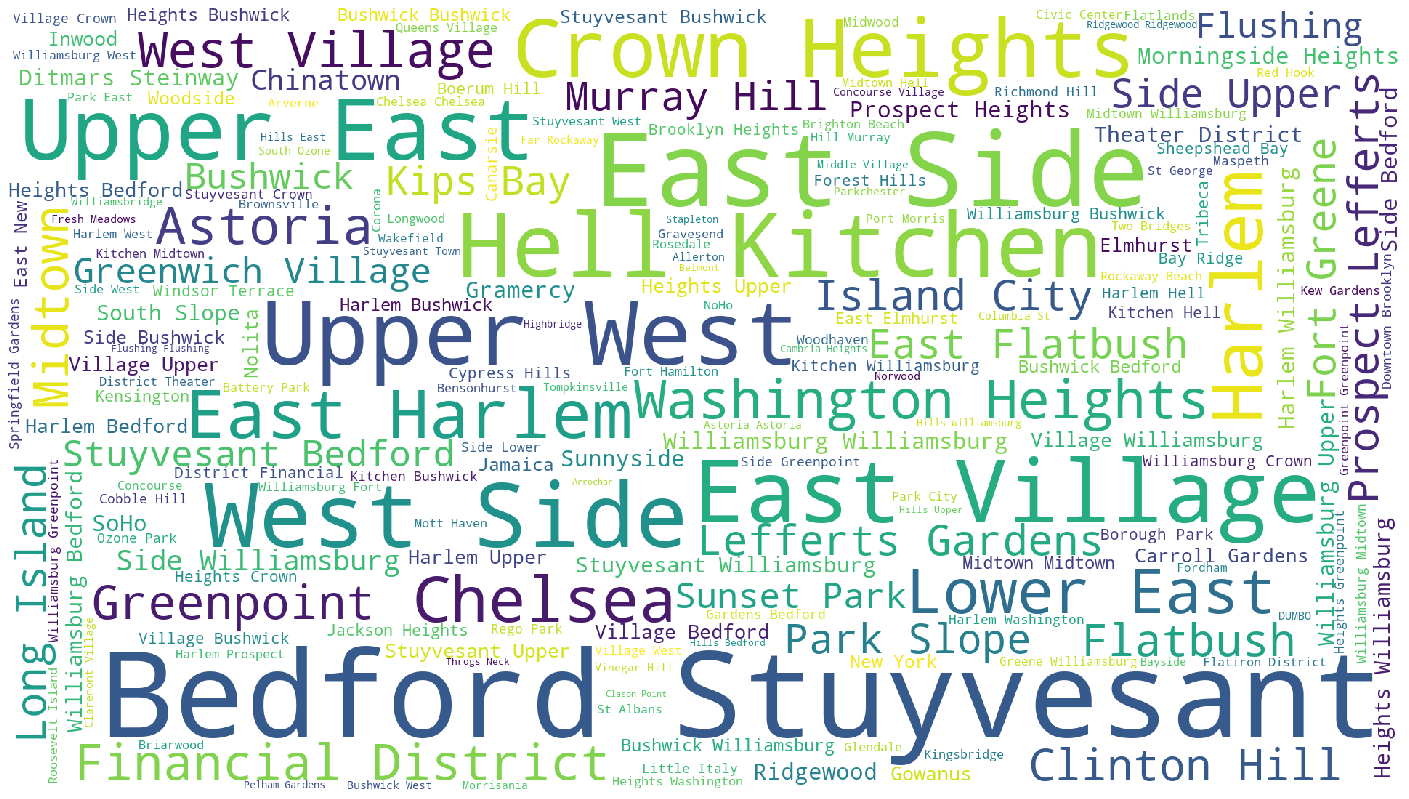

In [15]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(dataset.neighbourhood.apply(lambda x: map_neigh.get(x))))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [16]:
dataset.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'adj',
       'shared_in_name', 'airport_in_name', 'len_name'],
      dtype='object')

In [17]:
useless_columns = ['host_id']
dataset.drop(useless_columns, axis=1, inplace=True)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [19]:
all_columns = dataset.columns.to_numpy()
features = all_columns[all_columns != 'price']

In [20]:
x = dataset[features]
y = dataset['price']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=353)

In [22]:
#Linear Regression Model


folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 15))}]

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043850,0.006609,0.001694,0.000517,1,{'n_features_to_select': 1},0.023332,0.021860,0.023018,0.013944,...,0.022609,0.005384,14,0.020895,0.021273,0.021064,0.024119,0.020128,0.021496,0.001367
1,0.038601,0.001275,0.001427,0.000040,2,{'n_features_to_select': 2},0.025746,0.024155,0.024617,0.015394,...,0.024780,0.005903,13,0.022872,0.023275,0.023237,0.026415,0.022067,0.023573,0.001486
2,0.036358,0.000155,0.001576,0.000197,3,{'n_features_to_select': 3},0.027004,0.025536,0.026184,0.016395,...,0.026302,0.006341,12,0.024318,0.024688,0.024607,0.027968,0.023345,0.024985,0.001566
3,0.035521,0.000739,0.001455,0.000023,4,{'n_features_to_select': 4},0.061408,0.051900,0.070272,0.043777,...,0.063429,0.015904,11,0.059141,0.061847,0.057243,0.065375,0.055665,0.059854,0.003445
4,0.034116,0.000471,0.001576,0.000108,5,{'n_features_to_select': 5},0.062967,0.051848,0.070261,0.046371,...,0.064233,0.015231,10,0.060903,0.064052,0.057261,0.066721,0.055686,0.060925,0.004105
5,0.033460,0.001495,0.001587,0.000078,6,{'n_features_to_select': 6},0.063266,0.052294,0.073100,0.046401,...,0.065027,0.015522,9,0.061161,0.065212,0.058713,0.067071,0.057558,0.061943,0.003667
6,0.031280,0.001425,0.001604,0.000094,7,{'n_features_to_select': 7},0.064065,0.052761,0.073049,0.046403,...,0.065341,0.015538,8,0.061874,0.065322,0.059039,0.067073,0.057809,0.062223,0.003546
7,0.029206,0.000479,0.001604,0.000040,8,{'n_features_to_select': 8},0.065164,0.052760,0.073674,0.046975,...,0.065870,0.015560,7,0.062952,0.065322,0.059805,0.067877,0.058591,0.062909,0.003429
8,0.026667,0.001277,0.001609,0.000045,9,{'n_features_to_select': 9},0.065168,0.053924,0.075918,0.047219,...,0.066960,0.016119,6,0.062952,0.066106,0.060592,0.069239,0.059569,0.063692,0.003571
9,0.022933,0.000144,0.001651,0.000076,10,{'n_features_to_select': 10},0.065647,0.053749,0.076388,0.047040,...,0.067213,0.016446,5,0.063452,0.066349,0.061093,0.069506,0.060044,0.064089,0.003470


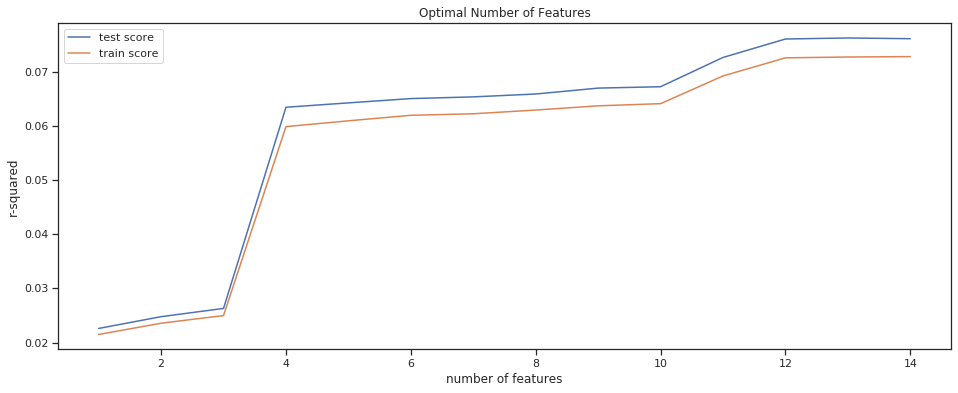

In [24]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [25]:
n_features_optimal = 12

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = lm.predict(x_test)
print("Linear Regression Test r2 score:", sklearn.metrics.r2_score(y_test, y_pred))

Linear Regression Test r2 score: 0.09207445098059386


In [26]:
#Decision Tree Regression 

from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
print("Train r2 score:", sklearn.metrics.r2_score(y_train,DTree.predict(x_train)))
y_predict=DTree.predict(x_test)
print("Decision Tree Test r2 score:", sklearn.metrics.r2_score(y_test,y_predict))

# R2 score on test set is negative ??!! => Maybe because simple decision trees tend to overfit on train data. 
# Need to use Random forest or xgBoost

Train r2 score: 0.4579036382375037
Decision Tree Test r2 score: -0.13415070392231798


In [27]:
# Random Forest Regression

regr = RandomForestRegressor(max_depth=6, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
pd.DataFrame(regr.feature_importances_.reshape(1, -1), columns=features)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,adj,shared_in_name,airport_in_name,len_name
0,0.000641,0.024064,0.135612,0.225573,0.201317,0.152702,0.020417,0.036307,0.040808,0.103559,0.025582,8.456848e-09,0.0,0.033419


In [29]:
y_pred = regr.predict(x_test)
print("Random Forest Test r2 score:", sklearn.metrics.r2_score(y_test,y_pred))

Random Forest Test r2 score: 0.17201584755458033


In [ ]:
# xgBoost Regression

import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
data_dmatrix_test = xgb.DMatrix(data=x_test,label=y_test)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10, 'subsample': 1}

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=5,
    reg_alpha=0,
    gamma=0,
    max_depth=3
)
regressor.fit(x_train, y_train)

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=features)

In [ ]:
y_pred = regressor.predict(x_test)
print("xgBoost Test r2 score:", sklearn.metrics.r2_score(y_test,y_pred))

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
# from sklearn.model_selection import GridSearchCV

In [31]:
import numpy as np

In [32]:
### Ridge Regression ###


## Defining parameters
model_Ridge= Ridge()
cv = 5

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
normalizes= ([True,False])

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                     param_grid=(dict(alpha=alphas, normalize= normalizes)),
                     scoring='r2',
                     cv=cv,
                     n_jobs=-1)

## Lastly, finding the best parameters.

grid_search_Ridge.fit(x_train, y_train)
best_parameters_Ridge = grid_search_Ridge.best_params_  
best_score_Ridge = grid_search_Ridge.best_score_ 
print(best_parameters_Ridge)
print(best_score_Ridge)
    


{'alpha': 0.01, 'normalize': True}
0.07608167969393871


In [33]:
y_pred = grid_search_Ridge.predict(x_test)
print("Ridge Regression Test r2 score:", sklearn.metrics.r2_score(y_test,y_pred))

Ridge Regression Test r2 score: 0.09225803250656384


In [34]:
### Lasso Regression ###


## Defining parameters
model_Lasso= Lasso()
cv = 5

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
normalizes= ([True,False])

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                     param_grid=(dict(alpha=alphas, normalize= normalizes)),
                     scoring='r2',
                     cv=cv,
                     n_jobs=-1)

## Lastly, finding the best parameters.

grid_search_lasso.fit(x_train, y_train)
best_parameters_lasso = grid_search_lasso.best_params_  
best_score_lasso = grid_search_lasso.best_score_ 
print(best_parameters_lasso)
print(best_score_lasso)

# lasso_reg(nyc_model_x, nyc_model_y)

{'alpha': 0.001, 'normalize': True}
0.07609590855673976


In [35]:
y_pred = grid_search_lasso.predict(x_test)
print("Lasso Regression Test r2 score:", sklearn.metrics.r2_score(y_test,y_pred))

Lasso Regression Test r2 score: 0.0923103585266768


In [36]:
### ElasticNet Regression ###


## Defining parameters
model_grid_Elastic= ElasticNet()
cv = 5
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
normalizes= ([True,False])

## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                     param_grid=(dict(alpha=alphas, normalize= normalizes)),
                     scoring='r2',
                     cv=cv,
                     n_jobs=-1)

## Lastly, finding the best parameters.

grid_search_elastic.fit(x_train, y_train)
best_parameters_elastic = grid_search_elastic.best_params_  
best_score_elastic = grid_search_elastic.best_score_ 
print(best_parameters_elastic)
print(best_score_elastic)

# elastic_reg(nyc_model_x, nyc_model_y)

{'alpha': 0.0001, 'normalize': False}
0.0760759434202943


In [37]:
y_pred = grid_search_elastic.predict(x_test)
print("Elastic Net Regression Test r2 score:", sklearn.metrics.r2_score(y_test,y_pred))

Elastic Net Regression Test r2 score: 0.09216598170133738
